In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

from findpoint import findpoint
import ModelEvaLib as me

In [2]:
chemfile = xr.open_dataset('F:/Data/case_anqing/compressed_chem.nc')

O3 = chemfile.O3
NO2 = chemfile.NO2
PM25 = chemfile.PM25
PM10 = chemfile.PM10
SO2 = chemfile.SO2
CO = chemfile.CO

lat = chemfile.latitude
lon = chemfile.longitude

## 1.$O_3$

In [37]:
sites = pd.read_excel('./obsdata/sites.xlsx',usecols=[2,3,4,5],index_col=1)
sitename = sites.index

lono = sites['经度']
lato = sites['纬度']

# items = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO',]
xls = pd.read_excel('./obsdata/O3.xlsx',index_col=0)
xls = xls.interpolate(axis=0,method='linear')
obsxls = xls.loc[O3.time.values]

In [24]:
x_index=[]
y_index=[]

for name in sitename:
    out_x, out_y = findpoint(lono[name],lato[name],O3)
    x_index.append(out_x)
    y_index.append(out_y)
nr = O3.isel(x=x_index, y=y_index)

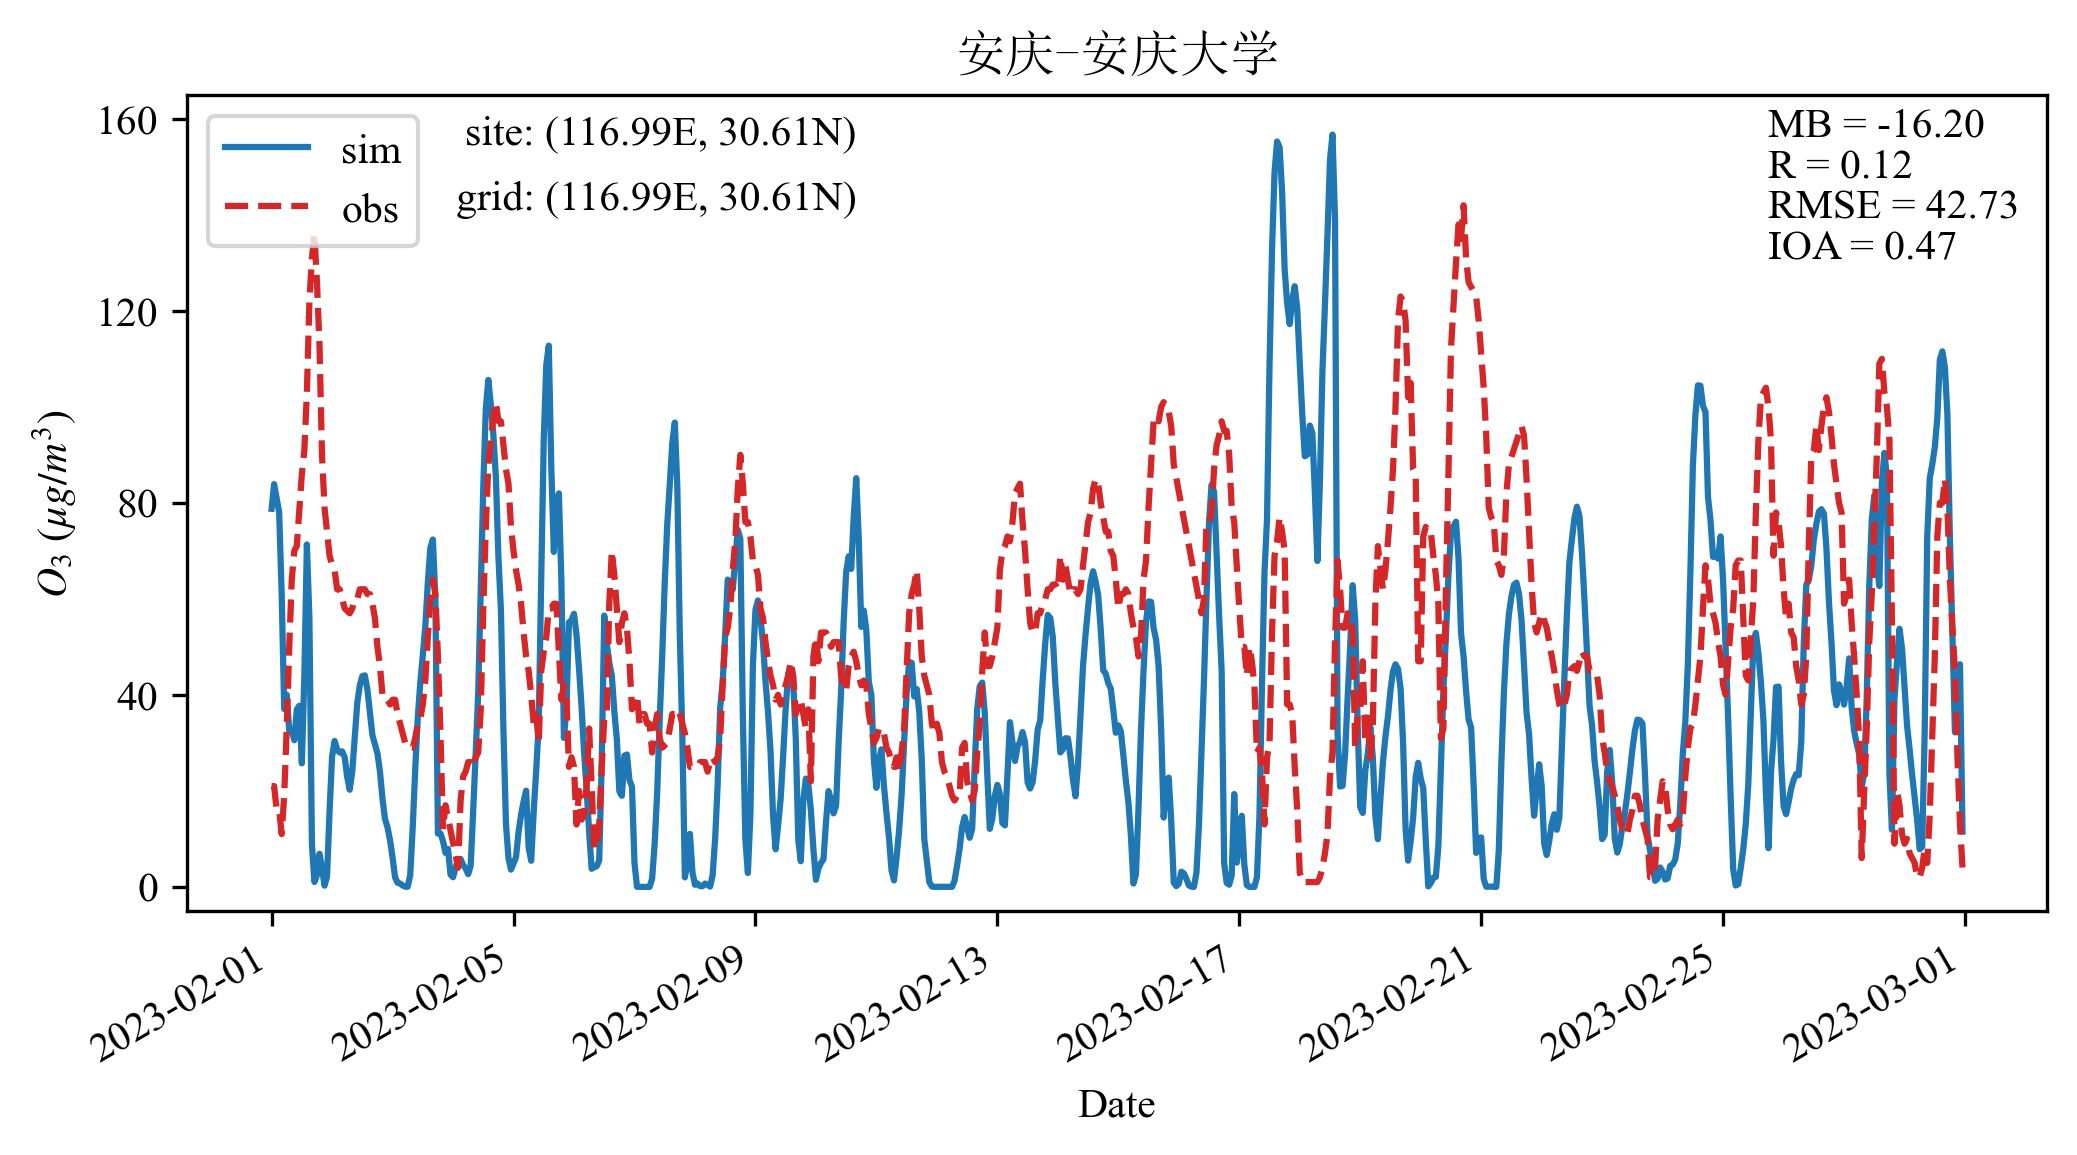

In [43]:
name = '安庆大学'
city = '安庆'
isite = 14

fig = plt.figure(figsize=(8,4),dpi=300)
ax = fig.subplots(1,1)

sim = nr[:,0,isite,isite]
obs = obsxls[isite]

sim.plot(ax=ax,linestyle='-',label='sim',color='tab:blue')
obs.plot(ax=ax,linestyle='--',label='obs',color='tab:red')

mb = np.array(np.mean(sim)-np.mean(obs))
r = pd.DataFrame({'A':sim,'B':obs}).corr().iloc[0,1]
rmse = me.cal_RMSE(obs,sim.data)
ioa = me.cal_IOA(obs,sim.data)

ax.text(x=0.85,y=0.95,s='MB = '+str(f"{mb:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.9,s='R = '+str(f"{r:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.85,s='RMSE = '+str(f"{rmse:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.8,s='IOA = '+str(f"{ioa:.2f}"),ha='left',transform=ax.transAxes)

ax.legend(loc=2)
ax.set_title(city+'-'+name,fontdict={'fontfamily':'SimSun'})
loctxt = 'site: ('+str(f"{lono[name]:.2f}")+'E, '+str(f"{lato[name]:.2f}")+'N)'
gridtxt = 'grid: ('+str(f"{sim.longitude.data:.2f}")+'E, '+str(f"{sim.latitude.data:.2f}")+'N)'
ax.text(x=0.36,y=0.94,s=loctxt,ha='right',transform=ax.transAxes)
ax.text(x=0.36,y=0.86,s=gridtxt,ha='right',transform=ax.transAxes)
ax.set_yticks(np.arange(0,161,40))
ax.set_ylim(-5,165)
ax.set_ylabel('$O_3$ ($\mu$$g/m^3$)')
ax.set_xlabel('Date')

plt.show()

In [48]:
isite = 0
for name in sitename:
    fig = plt.figure(figsize=(8,4),dpi=300)
    ax = fig.subplots(1,1)
    sim = nr[:,0,isite,isite]
    obs = obsxls[isite]
    city = sites['城市'][isite]
    
    sim.plot(ax=ax,linestyle='-',label='sim',color='tab:blue')
    obs.plot(ax=ax,linestyle='--',label='obs',color='tab:red')
    
    mb = np.array(np.mean(sim)-np.mean(obs))
    r = pd.DataFrame({'A':sim,'B':obs}).corr().iloc[0,1]
    rmse = me.cal_RMSE(obs,sim.data)
    ioa = me.cal_IOA(obs,sim.data)
    
    ax.text(x=0.85,y=0.95,s='MB = '+str(f"{mb:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.9,s='R = '+str(f"{r:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.85,s='RMSE = '+str(f"{rmse:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.8,s='IOA = '+str(f"{ioa:.2f}"),ha='left',transform=ax.transAxes)

    ax.legend(loc=2)
    ax.set_title(city+'-'+name,fontdict={'fontfamily':'SimSun'})
    loctxt = 'site: ('+str(f"{lono[name]:.2f}")+'E, '+str(f"{lato[name]:.2f}")+'N)'
    gridtxt = 'grid: ('+str(f"{sim.longitude.data:.2f}")+'E, '+str(f"{sim.latitude.data:.2f}")+'N)'
    ax.text(x=0.36,y=0.94,s=loctxt,ha='right',transform=ax.transAxes)
    ax.text(x=0.36,y=0.86,s=gridtxt,ha='right',transform=ax.transAxes)
    ax.set_yticks(np.arange(0,201,40))
    ax.set_ylabel('$O_3$ ($\mu$$g/m^3$)')
    ax.set_xlabel('Date')
    ax.set_ylim(-5,205)
    
    path = 'F:/Data/case_anqing/figure/February/逐站点/多市O3/'
    plt.savefig(path+city+'-'+name+'.png')
    print('saving '+city+'-'+name)
    
    isite += 1

saving 合肥-明珠广场
saving 合肥-三里街
saving 合肥-琥珀山庄
saving 合肥-董铺水库(对照点)
saving 合肥-长江中路
saving 合肥-庐阳区
saving 合肥-瑶海区
saving 合肥-包河区
saving 合肥-滨湖新区
saving 合肥-高新区
saving 合肥-高教基地
saving 安庆-环科院
saving 安庆-马山宾馆
saving 安庆-联富花园(停运180816)
saving 安庆-安庆大学
saving 安庆-市人大
saving 铜陵-市第四中学
saving 铜陵-市公路局
saving 铜陵-市新民污水厂
saving 铜陵-市第九中学
saving 铜陵-车站新区
saving 铜陵-市职教基地
saving 池州-环保大楼(停运160506)
saving 池州-池州学院
saving 池州-平天湖(对照点)
saving 池州-老干部局(停运190815)
saving 池州-展览馆
saving 池州-第八中学
saving 池州-第十二中学
saving 九江-十里
saving 九江-茅山头
saving 九江-西园
saving 九江-五七二七厂
saving 九江-水科所
saving 九江-综合工业园
saving 九江-石化总厂
saving 九江-庐山气象台(对照点)
saving 九江-外国语学校


## 2.$NO_2$

In [49]:
xls = pd.read_excel('./obsdata/NO2.xlsx',index_col=0)
xls = xls.interpolate(axis=0,method='linear')
obsxls = xls.loc[NO2.time.values]

nr = NO2.isel(x=x_index, y=y_index)

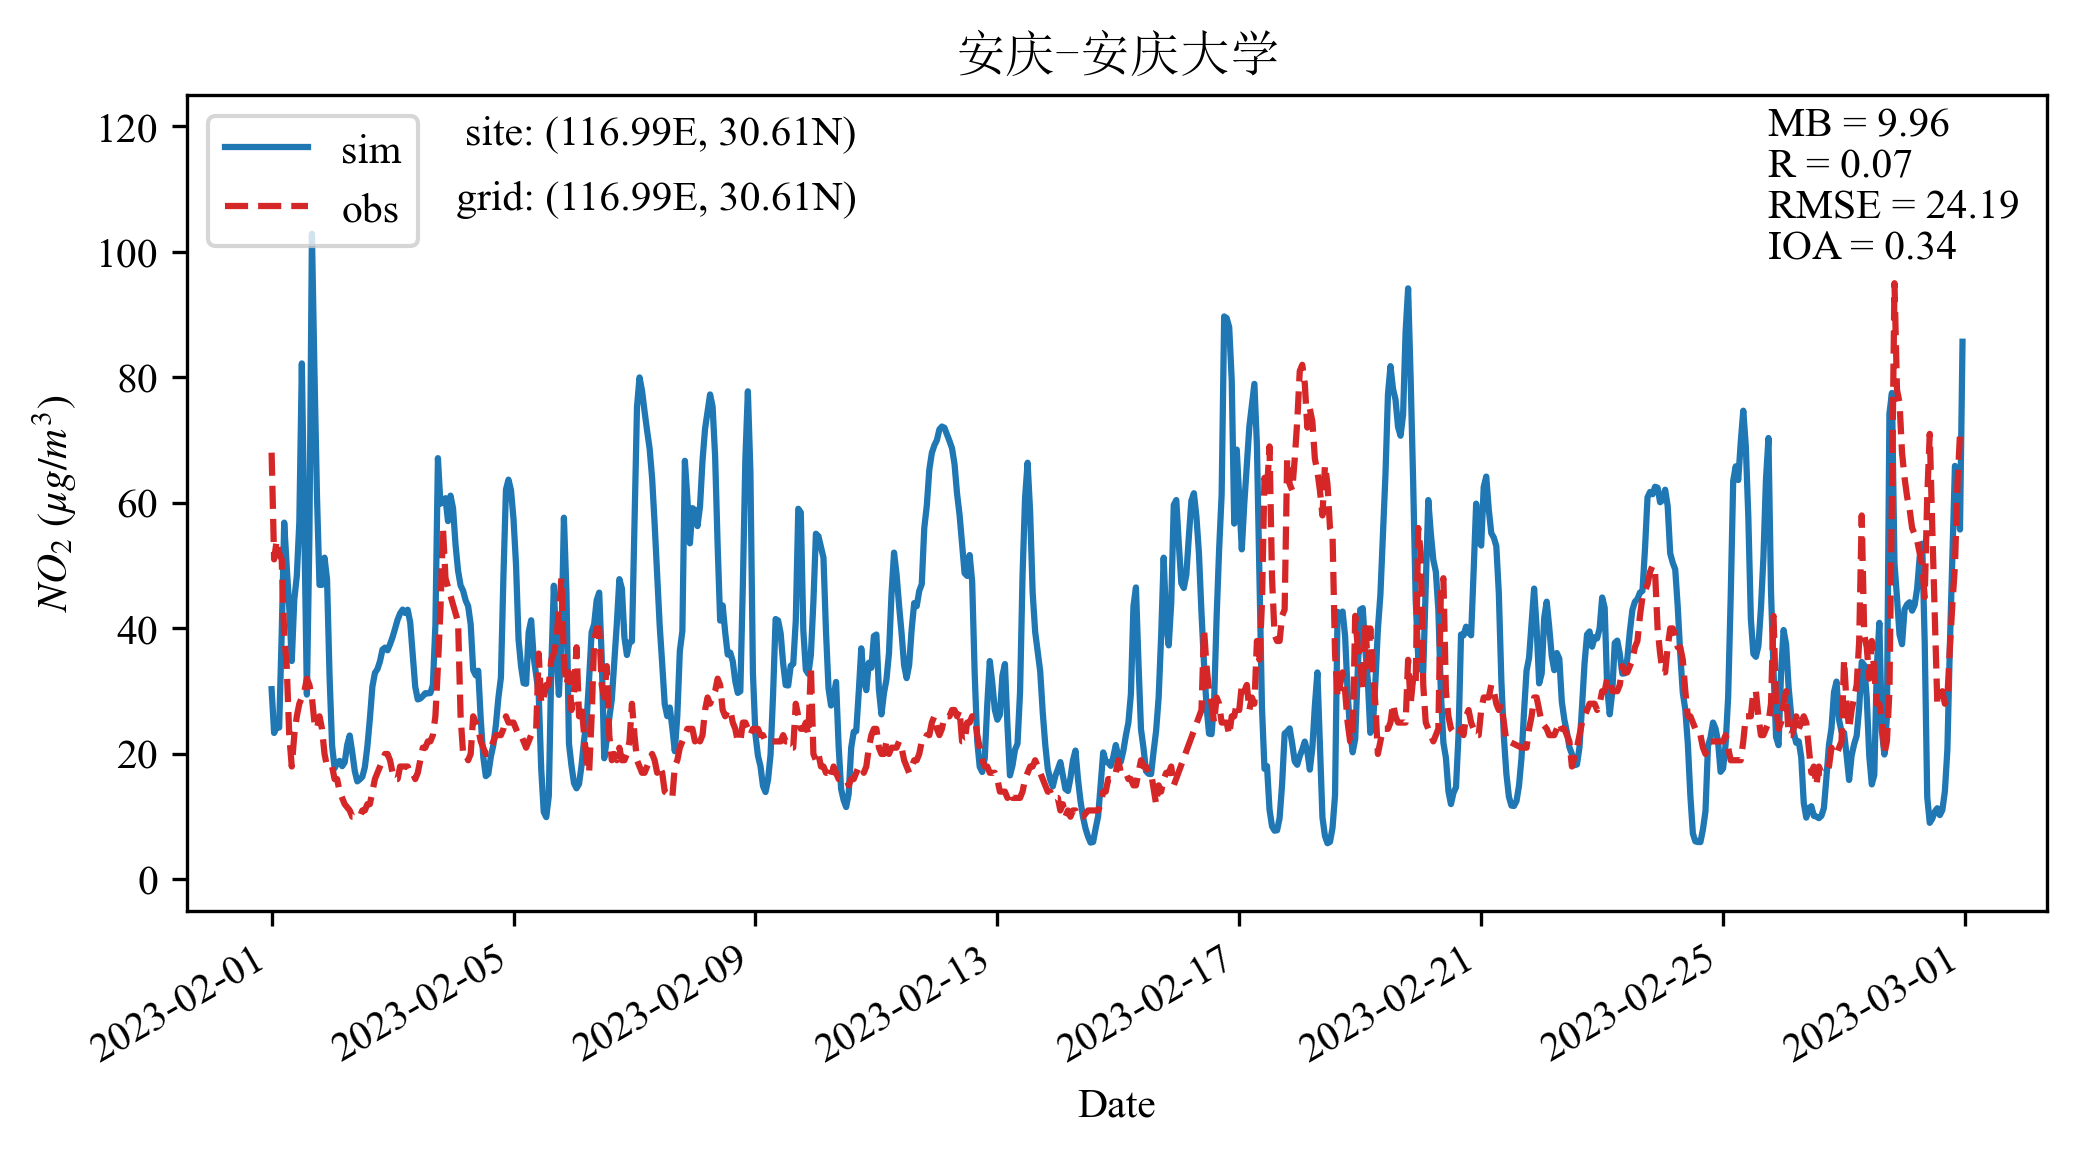

In [53]:
name = '安庆大学'
city = '安庆'
isite = 14

fig = plt.figure(figsize=(8,4),dpi=300)
ax = fig.subplots(1,1)

sim = nr[:,0,isite,isite]
obs = obsxls[isite]

sim.plot(ax=ax,linestyle='-',label='sim',color='tab:blue')
obs.plot(ax=ax,linestyle='--',label='obs',color='tab:red')

mb = np.array(np.mean(sim)-np.mean(obs))
r = pd.DataFrame({'A':sim,'B':obs}).corr().iloc[0,1]
rmse = me.cal_RMSE(obs,sim.data)
ioa = me.cal_IOA(obs,sim.data)

ax.text(x=0.85,y=0.95,s='MB = '+str(f"{mb:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.9,s='R = '+str(f"{r:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.85,s='RMSE = '+str(f"{rmse:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.8,s='IOA = '+str(f"{ioa:.2f}"),ha='left',transform=ax.transAxes)

ax.legend(loc=2)
ax.set_title(city+'-'+name,fontdict={'fontfamily':'SimSun'})
loctxt = 'site: ('+str(f"{lono[name]:.2f}")+'E, '+str(f"{lato[name]:.2f}")+'N)'
gridtxt = 'grid: ('+str(f"{sim.longitude.data:.2f}")+'E, '+str(f"{sim.latitude.data:.2f}")+'N)'
ax.text(x=0.36,y=0.94,s=loctxt,ha='right',transform=ax.transAxes)
ax.text(x=0.36,y=0.86,s=gridtxt,ha='right',transform=ax.transAxes)
ax.set_yticks(np.arange(0,121,20))
ax.set_ylim(-5,125)
ax.set_ylabel('$NO_2$ ($\mu$$g/m^3$)')
ax.set_xlabel('Date')

plt.show()

In [54]:
isite = 0
for name in sitename:
    fig = plt.figure(figsize=(8,4),dpi=300)
    ax = fig.subplots(1,1)
    sim = nr[:,0,isite,isite]
    obs = obsxls[isite]
    city = sites['城市'][isite]
    
    sim.plot(ax=ax,linestyle='-',label='sim',color='tab:blue')
    obs.plot(ax=ax,linestyle='--',label='obs',color='tab:red')
    
    mb = np.array(np.mean(sim)-np.mean(obs))
    r = pd.DataFrame({'A':sim,'B':obs}).corr().iloc[0,1]
    rmse = me.cal_RMSE(obs,sim.data)
    ioa = me.cal_IOA(obs,sim.data)
    
    ax.text(x=0.85,y=0.95,s='MB = '+str(f"{mb:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.9,s='R = '+str(f"{r:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.85,s='RMSE = '+str(f"{rmse:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.8,s='IOA = '+str(f"{ioa:.2f}"),ha='left',transform=ax.transAxes)

    ax.legend(loc=2)
    ax.set_title(city+'-'+name,fontdict={'fontfamily':'SimSun'})
    loctxt = 'site: ('+str(f"{lono[name]:.2f}")+'E, '+str(f"{lato[name]:.2f}")+'N)'
    gridtxt = 'grid: ('+str(f"{sim.longitude.data:.2f}")+'E, '+str(f"{sim.latitude.data:.2f}")+'N)'
    ax.text(x=0.36,y=0.94,s=loctxt,ha='right',transform=ax.transAxes)
    ax.text(x=0.36,y=0.86,s=gridtxt,ha='right',transform=ax.transAxes)
    ax.set_yticks(np.arange(0,121,40))
    ax.set_ylabel('$NO_2$ ($\mu$$g/m^3$)')
    ax.set_xlabel('Date')
    ax.set_ylim(-5,125)
    
    path = 'F:/Data/case_anqing/figure/February/逐站点/多市NO2/'
    plt.savefig(path+city+'-'+name+'.png')
    
    isite += 1

## 3.$PM_{2.5}$

In [55]:
xls = pd.read_excel('./obsdata/PM2.5.xlsx',index_col=0)
xls = xls.interpolate(axis=0,method='linear')
obsxls = xls.loc[PM25.time.values]

nr = PM25.isel(x=x_index, y=y_index)

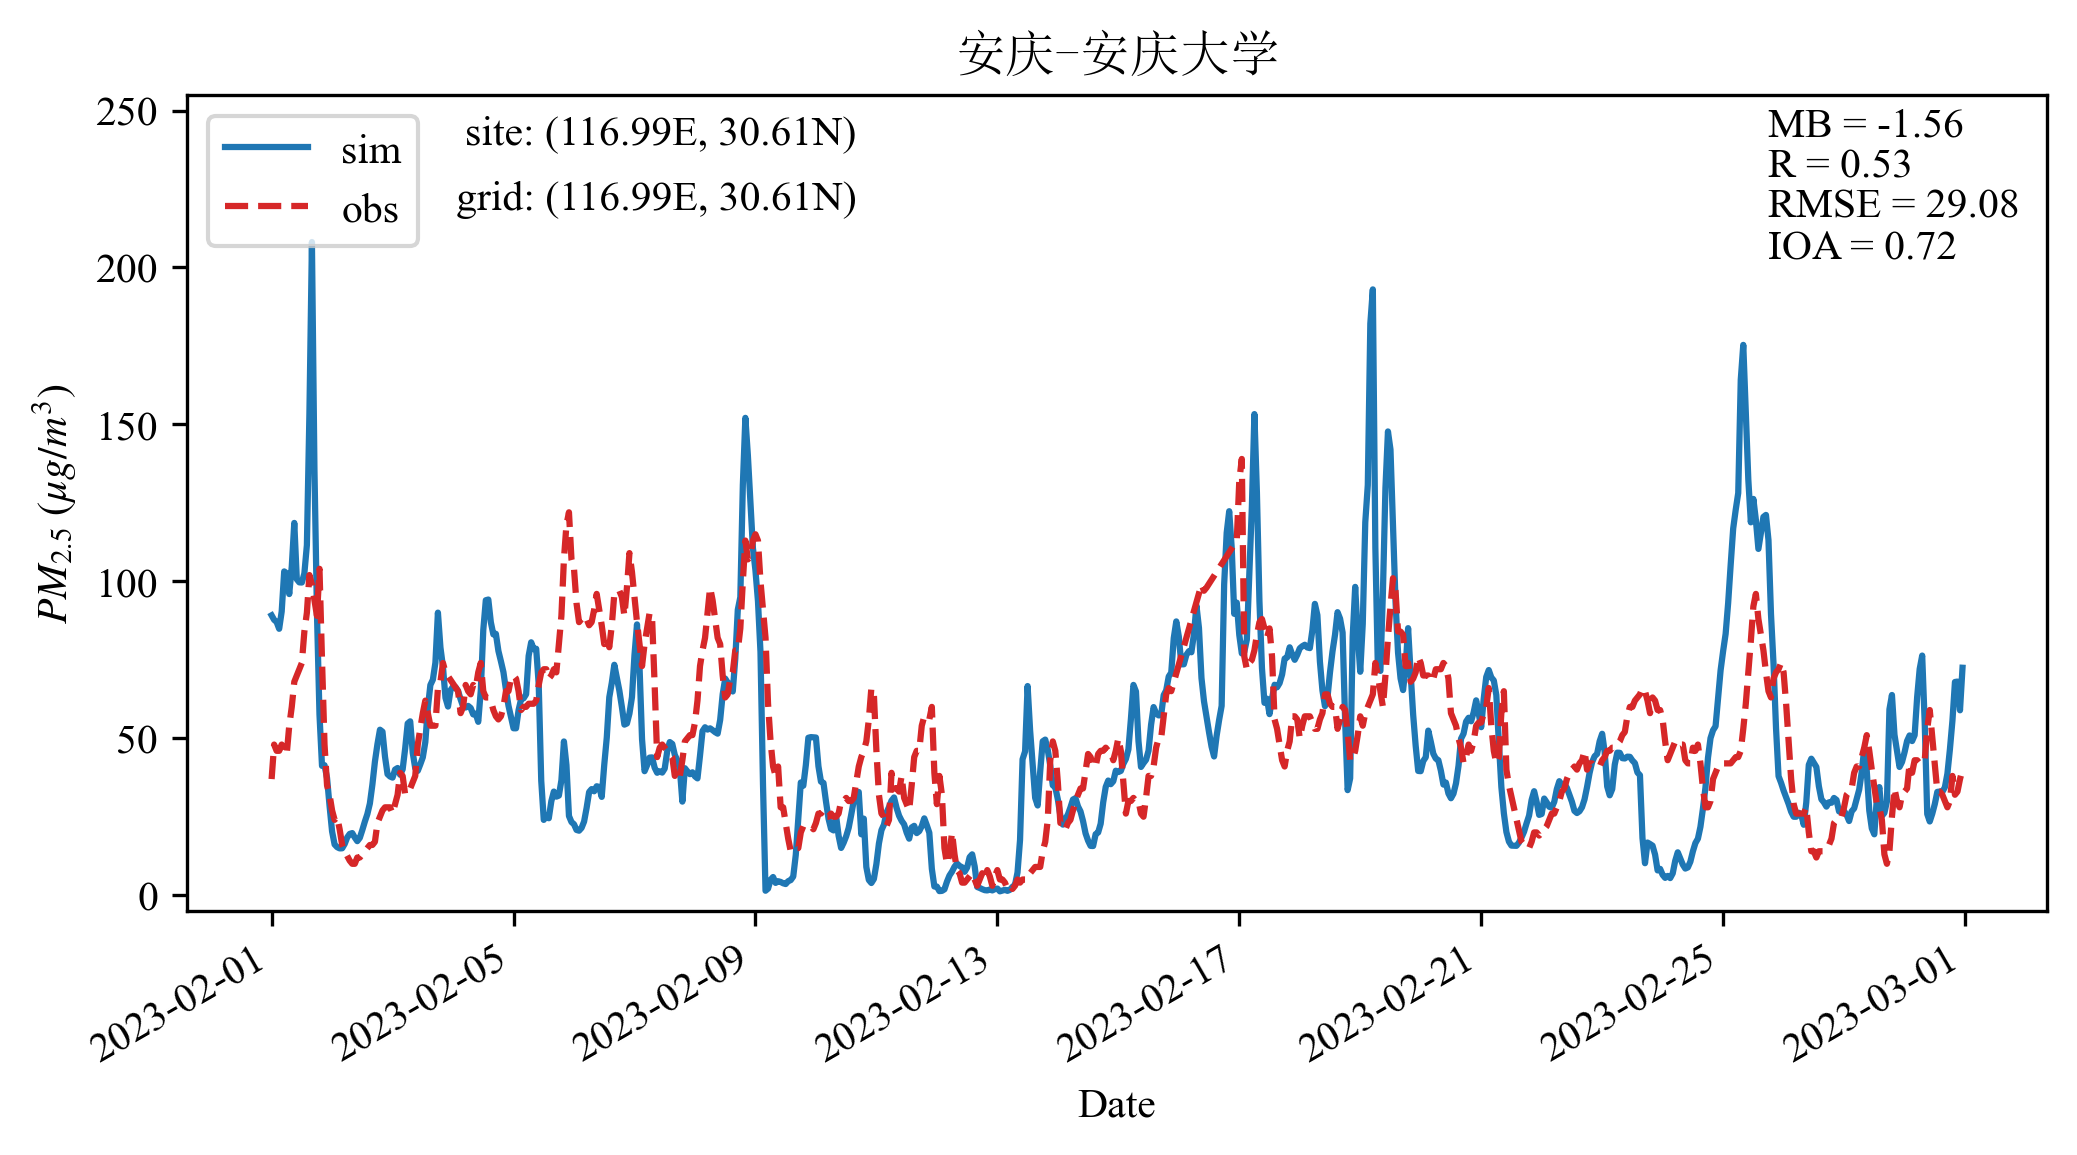

In [60]:
name = '安庆大学'
city = '安庆'
isite = 14

fig = plt.figure(figsize=(8,4),dpi=300)
ax = fig.subplots(1,1)

sim = nr[:,0,isite,isite]
obs = obsxls[isite]

sim.plot(ax=ax,linestyle='-',label='sim',color='tab:blue')
obs.plot(ax=ax,linestyle='--',label='obs',color='tab:red')

mb = np.array(np.mean(sim)-np.mean(obs))
r = pd.DataFrame({'A':sim,'B':obs}).corr().iloc[0,1]
rmse = me.cal_RMSE(obs,sim.data)
ioa = me.cal_IOA(obs,sim.data)

ax.text(x=0.85,y=0.95,s='MB = '+str(f"{mb:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.9,s='R = '+str(f"{r:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.85,s='RMSE = '+str(f"{rmse:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.8,s='IOA = '+str(f"{ioa:.2f}"),ha='left',transform=ax.transAxes)

ax.legend(loc=2)
ax.set_title(city+'-'+name,fontdict={'fontfamily':'SimSun'})
loctxt = 'site: ('+str(f"{lono[name]:.2f}")+'E, '+str(f"{lato[name]:.2f}")+'N)'
gridtxt = 'grid: ('+str(f"{sim.longitude.data:.2f}")+'E, '+str(f"{sim.latitude.data:.2f}")+'N)'
ax.text(x=0.36,y=0.94,s=loctxt,ha='right',transform=ax.transAxes)
ax.text(x=0.36,y=0.86,s=gridtxt,ha='right',transform=ax.transAxes)
ax.set_yticks(np.arange(0,251,50))
ax.set_ylim(-5,255)
ax.set_ylabel('$PM_{2.5}$ ($\mu$$g/m^3$)')
ax.set_xlabel('Date')

plt.show()

In [61]:
isite = 0
for name in sitename:
    fig = plt.figure(figsize=(8,4),dpi=300)
    ax = fig.subplots(1,1)
    sim = nr[:,0,isite,isite]
    obs = obsxls[isite]
    city = sites['城市'][isite]
    
    sim.plot(ax=ax,linestyle='-',label='sim',color='tab:blue')
    obs.plot(ax=ax,linestyle='--',label='obs',color='tab:red')
    
    mb = np.array(np.mean(sim)-np.mean(obs))
    r = pd.DataFrame({'A':sim,'B':obs}).corr().iloc[0,1]
    rmse = me.cal_RMSE(obs,sim.data)
    ioa = me.cal_IOA(obs,sim.data)
    
    ax.text(x=0.85,y=0.95,s='MB = '+str(f"{mb:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.9,s='R = '+str(f"{r:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.85,s='RMSE = '+str(f"{rmse:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.8,s='IOA = '+str(f"{ioa:.2f}"),ha='left',transform=ax.transAxes)

    ax.legend(loc=2)
    ax.set_title(city+'-'+name,fontdict={'fontfamily':'SimSun'})
    loctxt = 'site: ('+str(f"{lono[name]:.2f}")+'E, '+str(f"{lato[name]:.2f}")+'N)'
    gridtxt = 'grid: ('+str(f"{sim.longitude.data:.2f}")+'E, '+str(f"{sim.latitude.data:.2f}")+'N)'
    ax.text(x=0.36,y=0.94,s=loctxt,ha='right',transform=ax.transAxes)
    ax.text(x=0.36,y=0.86,s=gridtxt,ha='right',transform=ax.transAxes)
    ax.set_yticks(np.arange(0,251,50))
    ax.set_ylabel('$PM_{2.5}$ ($\mu$$g/m^3$)')
    ax.set_xlabel('Date')
    ax.set_ylim(-5,255)
    
    path = 'F:/Data/case_anqing/figure/February/逐站点/多市PM25/'
    plt.savefig(path+city+'-'+name+'.png')
    
    isite += 1